# K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## KNN com distância euclideana

In [3]:
class EuclideanKNearestNeighbors:
    
    # Construtor
    def __init__(self, x, y, k):
        self.x = x
        self.y = y
        self.k = k
    
    # Getters
    def getX(self):
        return self.x
        
    def getY(self):
        return self.y
    
    def getK(self):
        return self.k
    
    # Setters
    def setX(self, x):
        self.x = x
        
    def setY(self, y):
        self.y = y
    
    def setK(self, k):
        self.k = k
        
    # Métodos
    def distance(self, x1, x2):
        return np.sqrt(((x1 - x2)**2).sum())
    
    def nearest(self, distances):
        near = distances[0]
        near_idx = 0
        for i, d in enumerate(distances):
            if d[0] < near[0]:
                near = d
                near_idx = i
        return near, near_idx
            
    def k_nearest(self, distances):
        k_near = np.zeros((self.k, self.x.shape[1]))
        for i in range(self.k):
            k_near[i], near_idx = self.nearest(distances)
            distances = np.delete(distances, near_idx, axis=0)
        return k_near
    
    def classify(self, new_x, append = False):
        
        distances = np.zeros(self.x.shape)
        
        for i, x in enumerate(self.x):
            distances[i, 0] = self.distance(x, new_x)
            distances[i, 1] = self.y[i]
            
        k_near = self.k_nearest(distances)
        clss = round(k_near[:, 1].mean())
        
        if append:
            self.x = np.vstack((self.x, new_x))
            self.y = np.vstack((self.y, clss))
        
        return clss

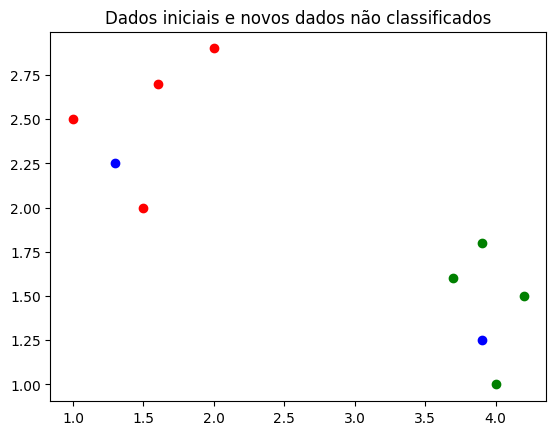

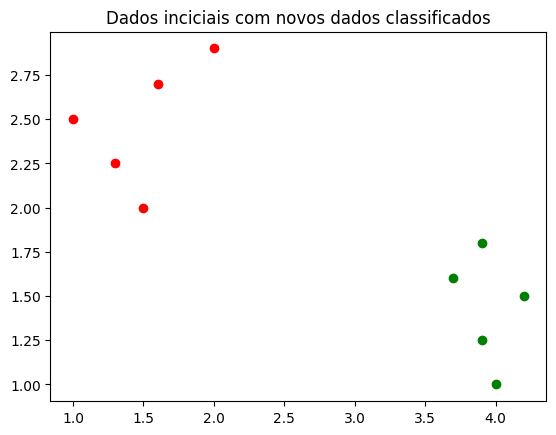

In [24]:
x = np.array([[1.5, 2.0], 
              [2.0, 2.9], 
              [1.0, 2.5], 
              [1.6, 2.7],
              [4.0, 1.0],
              [4.2, 1.5],
              [3.9, 1.8],
              [3.7, 1.6]])

y = np.array([[0], 
              [0], 
              [0],
              [0],
              [1],
              [1],
              [1],
              [1]])

new_x = np.array([[1.3, 2.25],
                  [3.9, 1.25]])

knn = EuclideanKNearestNeighbors(x, y, 3)

knn.classify(new_x[0], append=True)
knn.classify(new_x[1], append=True)

x_with_new_data = knn.getX()
y_with_new_data = knn.getY()

plt.title("Dados iniciais e novos dados não classificados")

for i in range(x.shape[0]):
    if y[i] == 0:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')
    
for i in range(new_x.shape[0]):
    plt.plot(new_x[i,0], new_x[i,1], 'bo')

plt.show()

plt.title("Dados inciciais com novos dados classificados")

for i in range(x_with_new_data.shape[0]):
    if y_with_new_data[i] == 0:
        plt.plot(x_with_new_data[i,0], x_with_new_data[i,1], 'ro')
    else:
        plt.plot(x_with_new_data[i,0], x_with_new_data[i,1], 'go')

plt.show()

## KNN com distância de mahalanobis

In [21]:
class MahalanobisKNearestNeighbors:
    
    # Construtor
    def __init__(self, x, y, k):
        self.x = x
        self.y = y
        self.k = k
        self.classes = np.amax(y) + 1 # Assume que a primeira classe é 0, a segunda é 1... etc
        self.n_per_class = np.zeros((self.classes, 1))
        self.cov = np.zeros((self.classes, x.shape[1], x.shape[1]))
        
        # Calcula n_per_class
        for clss in range(self.classes):
            self.n_per_class[clss] = len(y[y==clss])
        
        # Calcula a variância de cada feature para cada classe
        for clss in range(self.classes):
            self.cov[clss] = np.cov(x[y[y == clss], :], rowvar=False)/self.n_per_class[clss]
            self.cov[clss] += np.identity(self.cov.shape[1]) * 1e-10
        
        self.inv_cov = np.linalg.inv(self.cov)
    
    # Getters
    def getX(self):
        return self.x
        
    def getY(self):
        return self.y
    
    def getK(self):
        return self.k
    
    def getCov(self):
        return self.cov
    
    # Setters
    def setXY(self, x, y):
        self.x = x
        self.y = y
        self.classes = np.amax(y) + 1 # Assume que a primeira classe é 0, a segunda é 1... etc
        self.n_per_class = np.zeros((self.classes, 1))
        self.cov = np.zeros((self.classes, x.shape[1], x.shape[1]))
        
        # Calcula n_per_class
        for clss in range(self.classes):
            self.n_per_class[clss] = len(y[y==clss])
        
        # Calcula a variância de cada feature para cada classe
        for clss in range(self.classes):
            self.cov[clss] = np.cov(x[y[y == clss], :], rowvar=False)/self.n_per_class[clss]
            self.cov[clss] += np.identity(self.cov.shape[1]) * 1e-10
        
        self.inv_cov = np.linalg.inv(self.cov)
    
    def setK(self, k):
        self.k = k
        
    # Métodos
    def distance(self, x1, x2):
        diff = x1 - x2
        return np.sqrt((diff.T @ self.inv_cov @ diff).sum())
    
    def nearest(self, distances):
        near = distances[0]
        near_idx = 0
        for i, d in enumerate(distances):
            if d[0] < near[0]:
                near = d
                near_idx = i
        return near, near_idx
            
    def k_nearest(self, distances):
        k_near = np.zeros((self.k, self.x.shape[1]))
        for i in range(self.k):
            k_near[i], near_idx = self.nearest(distances)
            distances = np.delete(distances, near_idx, axis=0)
        return k_near
    
    def classify(self, new_x, append = False):
        
        distances = np.zeros(self.x.shape)
        
        for i, x in enumerate(self.x):
            distances[i, 0] = self.distance(x, new_x)
            distances[i, 1] = self.y[i]
            
        k_near = self.k_nearest(distances)
        clss = round(k_near[:, 1].mean())
        
        if append:
            self.x = np.vstack((self.x, new_x))
            self.y = np.vstack((self.y, clss))
        
        return clss

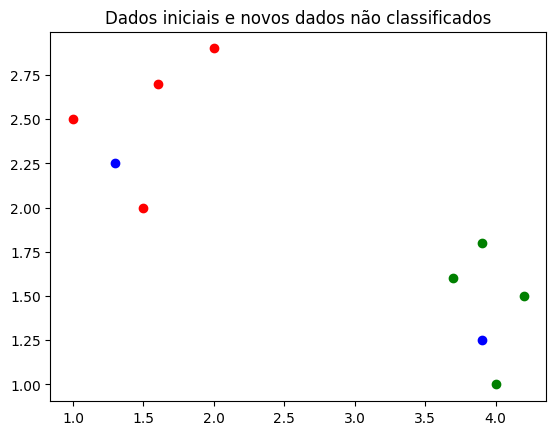

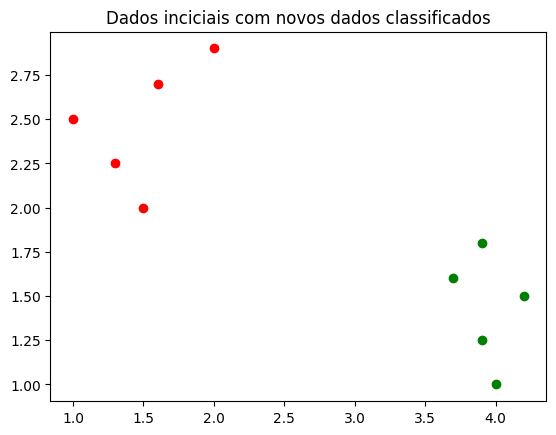

In [23]:
x = np.array([[1.5, 2.0], 
              [2.0, 2.9], 
              [1.0, 2.5], 
              [1.6, 2.7],
              [4.0, 1.0],
              [4.2, 1.5],
              [3.9, 1.8],
              [3.7, 1.6]])

y = np.array([[0], 
              [0], 
              [0],
              [0],
              [1],
              [1],
              [1],
              [1]])

new_x = np.array([[1.3, 2.25],
                  [3.9, 1.25]])

knn = MahalanobisKNearestNeighbors(x, y, 3)

knn.classify(new_x[0], append=True)
knn.classify(new_x[1], append=True)

x_with_new_data = knn.getX()
y_with_new_data = knn.getY()

plt.title("Dados iniciais e novos dados não classificados")

for i in range(x.shape[0]):
    if y[i] == 0:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')
    
for i in range(new_x.shape[0]):
    plt.plot(new_x[i,0], new_x[i,1], 'bo')

plt.show()

plt.title("Dados inciciais com novos dados classificados")

for i in range(x_with_new_data.shape[0]):
    if y_with_new_data[i] == 0:
        plt.plot(x_with_new_data[i,0], x_with_new_data[i,1], 'ro')
    else:
        plt.plot(x_with_new_data[i,0], x_with_new_data[i,1], 'go')

plt.show()